## Testing matminer volume predictor with 62 structures
#### predicted volume is the same no matter what volume we start with (either initial or relaxed)

### Import libraries and set the path which contains the structures in .cif

In [39]:
import os
import pandas as pd
from pymatgen import Structure
from matminer.learners.volume_predictor import VolumePredictor
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

INITIAL_STRUCTURES_PATH = 'matminerStructures/initial/'
RELAXED_STRUCTURES_PATH = 'matminerStructures/relaxed/'

### Import each Structure into a list of dicts
### [{'reduced_formula', 'initial_vol', 'predicted_vol'}]

In [113]:
initial_volumes = []
for f in os.listdir(INITIAL_STRUCTURES_PATH):
    if f.endswith(".cif"):
        s = Structure.from_file(INITIAL_STRUCTURES_PATH+f)
        pred_vol = VolumePredictor().predict(s)
        initial_volumes.append({'reduced_formula':s.composition.reduced_formula, 'initial_volume':s.volume, 'predicted_volume':pred_vol})
        # print s.composition.reduced_formula, "Initial vol: {}".format(s.volume), "Predicted vol: {}".format(pred_vol)

### [{'reduced_formula', 'relaxed_vol'}] 
### since predicted volumes are the same, calculate based on initial_vol

In [92]:
relaxed_volumes = []
for f in os.listdir(RELAXED_STRUCTURES_PATH):
    if f.endswith(".cif"):
        s = Structure.from_file(RELAXED_STRUCTURES_PATH+f)
        #pred_vol = VolumePredictor().predict(s)
        #relaxed_volumes.append({'reduced_formula':s.composition.reduced_formula, 'relaxed_volume':s.volume, 'predicted_volume':pred_vol})
        relaxed_volumes.append({'reduced_formula':s.composition.reduced_formula, 'relaxed_volume':s.volume})
        # print s.composition.reduced_formula, "Initial vol: {}".format(s.volume), "Predicted vol: {}".format(pred_vol)

## put initial, relaxed, and predicted volumes in to a Dataframe

In [138]:
i_v = pd.DataFrame(initial_volumes, columns=['reduced_formula', 'initial_volume', 'predicted_volume'])
r_v = pd.DataFrame(relaxed_volumes, columns=['reduced_formula', 'relaxed_volume'])
#i_v = pd.DataFrame(initial_volumes)
#r_v = pd.DataFrame(relaxed_volumes)
# v = i_v.merge(r_v, on='reduced_formula')

v = i_v.merge(r_v, on='reduced_formula', left_index=True, right_index=True)
v = v[['reduced_formula', 'initial_volume', 'relaxed_volume', 'predicted_volume']] # rearrange order of columns
# v['vols_equ'] = v['initial_volume']==v['relaxed_volume'] # just checking if initial and relaxed volumes were all equal..
# v = pd.concat([i_v, r_v], axis=1)
with pd.option_context('display.max_rows', 999, 'display.max_columns', 5):
    print v

   reduced_formula  initial_volume  relaxed_volume  predicted_volume
0         Ag7P3O11     1741.075564     1741.075564       1741.075614
1            Al2O3      378.048414      378.048414        378.048424
2             B2S3      338.738057      338.738057        338.738063
3    Ba2Li2(SiO3)3     1889.087837     1889.087837       1889.087741
4      Ba2Mg(BO3)2     1896.766961     1896.766961       1896.766867
5     Ba3Mg3(PO4)4      822.261527      822.261527        822.261511
6        Ba3Y2SiO8     1282.023083     1282.023083       1282.023044
7      Ba4Li2B4O11      972.939013      972.939013        972.939138
8      Ba6Y2Si4O17     1224.903744     1224.903744       1224.903711
9       BaLi(BO2)3      939.905589      939.905589        939.905638
10    BaLi2(SiO3)2      907.915187      907.915187        907.915279
11       BaLi2P2O7     1198.169787     1198.169787       1198.169918
12     BaMg2(PO4)2     1872.020236     1872.020236       1872.020416
13    BaMg3(SiO4)2     1563.378631

## Plot relaxed_volume vs predicted_volume

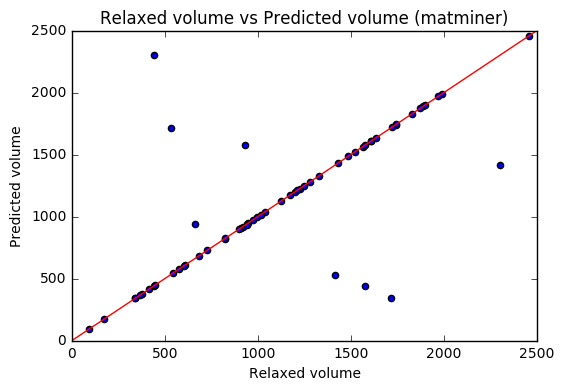

In [134]:
plt.scatter(v['relaxed_volume'], v['predicted_volume'])
# plot x = y since predicted_volume should (theoretically) match
x = [0, 2500]
y = [0, 2500]
plt.plot(x,y,'r')
plt.axis([0, 2500, 0, 2500]) # set axes length
plt.xlabel('Relaxed volume')
plt.ylabel('Predicted volume')
plt.title('Relaxed volume vs Predicted volume (matminer)')

## Plot initial_volume vs predicted_volume

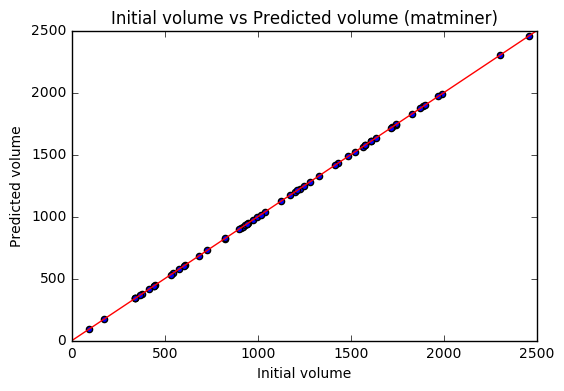

In [135]:
plt.scatter(v['initial_volume'], v['predicted_volume'])
# plot x = y since predicted_volume should (theoretically) match
x = [0, 2500]
y = [0, 2500]
plt.plot(x,y,'r')
plt.axis([0, 2500, 0, 2500]) # set axes length
plt.xlabel('Initial volume')
plt.ylabel('Predicted volume')
plt.title('Initial volume vs Predicted volume (matminer)')